In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
#import geopandas
from mitosheet import sheet
import dtale
import missingno as msno
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("cleaned_data.csv")
df.head(3)

incident_number  offense_code offense_code_group  \
0      I192068249          2647              other   
1      I192061894          1106   confidence games   
2      I192038828          1107              fraud   

               offense_description district reporting_area  shooting  year  \
0        threats to do bodily harm       B2            280         0  2015   
1  fraud - credit card / atm fraud      C11            356         0  2015   
2            fraud - impersonation       A1            172         0  2015   

   month day_of_week  hour  ucr_part         street        lat       long  \
0      8      Friday    10  Part Two  washington st  42.330119 -71.084251   
1      8    Thursday     0  Part Two     charles st  42.300605 -71.061268   
2     11      Monday    12  Part Two      albany st  42.334288 -71.072395   

                      location  
0  (42.33011862, -71.08425106)  
1  (42.30060543, -71.06126785)  
2  (42.33428841, -71.07239518)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591489 entries, 0 to 591488
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      591489 non-null  object 
 1   offense_code         591489 non-null  int64  
 2   offense_code_group   591489 non-null  object 
 3   offense_description  591489 non-null  object 
 4   district             591489 non-null  object 
 5   reporting_area       591489 non-null  object 
 6   shooting             591489 non-null  int64  
 7   year                 591489 non-null  int64  
 8   month                591489 non-null  int64  
 9   day_of_week          591489 non-null  object 
 10  hour                 591489 non-null  int64  
 11  ucr_part             591489 non-null  object 
 12  street               591489 non-null  object 
 13  lat                  591489 non-null  float64
 14  long                 591489 non-null  float64
 15  location         

In [5]:
df.shape

(591489, 16)

In [6]:
df[df.street == 'columbia road']

incident_number  offense_code  \
328103       129099920          3301   
334628       192087664          2670   
422377       202082385          1501   
480092       212093171          1501   
480641       212092366          1810   
486715       212082935          3502   
494813       212071271          1501   
503061       212059476          1501   
521020       212032849          3807   
529067       212020561           423   
544513       222064571          2907   
547618       222059721           423   
559024       222043840          1831   
559340       222043422          3115   
560258       222042110          1501   
560949       222041144           520   
562040       222039670           724   
562880       222038514          3831   
564325       222036503           614   
568855       222030149          1810   
570022       222028591          3301   
570625       222049470          3803   
579740       222015507          2905   
584442       222009568           301   
585360       222007897           801   
589617       222002086          2905   
589791       222001829          3115   

                                       offense_code_group  \
328103                                     verbal dispute   
334628                    harassment/ criminal harassment   
422377  weapon violation - carry/ possessing/ sale/ tr...   
480092  weapon violation - carry/ possessing/ sale/ tr...   
480641       drugs - possession/ sale/ manufacturing/ use   
486715                           missing person - located   
494813  weapon violation - carry/ possessing/ sale/ tr...   
503061  weapon violation - carry/ possessing/ sale/ tr...   
521020                  m/v accident - other city vehicle   
529067                               assault - aggravated   
544513                    val - operating after rev/susp.   
547618                               assault - aggravated   
559024                                        sick assist   
559340                                 investigate person   
560258  weapon violation - carry/ possessing/ sale/ tr...   
560949                             burglary - residential   
562040                                         auto theft   
562880              m/v - leaving scene - property damage   
564325              larceny theft from mv - non-accessory   
568855       drugs - possession/ sale/ manufacturing/ use   
570022                                     verbal dispute   
570625                     m/v accident - personal injury   
579740                        val - violation of auto law   
584442                                            robbery   
585360                                   assault - simple   
589617                        val - violation of auto law   
589791                                 investigate person   

                                      offense_description district  \
328103                                     verbal dispute       B2   
334628                    harassment/ criminal harassment       B2   
422377  weapon violation - carry/ possessing/ sale/ tr...       C6   
480092  weapon violation - carry/ possessing/ sale/ tr...      C11   
480641       drugs - possession/ sale/ manufacturing/ use       C6   
486715                           missing person - located       B2   
494813  weapon violation - carry/ possessing/ sale/ tr...       B2   
503061  weapon violation - carry/ possessing/ sale/ tr...       C6   
521020                  m/v accident - other city vehicle      C11   
529067                               assault - aggravated       B2   
544513                    val - operating after rev/susp.      C11   
547618                               assault - aggravated       B2   
559024                                        sick assist       B2   
559340                                 investigate person       B2   
560258  weapon violation - carry/ possessing/ sale/ tr...      C11   
560949                             burglary - residential

In [7]:
df[df.street == 'blue hill avenue']

incident_number  offense_code  \
328270       192078780          2905   
328396       192078951          1810   
329256       192080201          2646   
329466       192080498          1402   
329597       192080683           801   
...                ...           ...   
588789       222003226          1501   
591158       220340225          1107   
591222       220043922          3115   
591484       122207734          3831   
591485       122201046          2101   

                                       offense_code_group  \
328270                        val - violation of auto law   
328396       drugs - possession/ sale/ manufacturing/ use   
329256                liquor/alcohol - drinking in public   
329466                                          vandalism   
329597                                   assault - simple   
...                                                   ...   
588789  weapon violation - carry/ possessing/ sale/ tr...   
591158                              fraud - impersonation   
591222                                 investigate person   
591484              m/v - leaving scene - property damage   
591485        operating under the influence (oui) alcohol   

                                      offense_description district  \
328270                        val - violation of auto law       B3   
328396       drugs - possession/ sale/ manufacturing/ use       B3   
329256                liquor/alcohol - drinking in public       B2   
329466                                          vandalism       B2   
329597                                   assault - simple       B3   
...                                                   ...      ...   
588789  weapon violation - carry/ possessing/ sale/ tr...       B2   
591158                              fraud - impersonation       B3   
591222                                 investigate person       B2   
591484              m/v - leaving scene - property damage       B3   
591485        operating under the influence (oui) alcohol       B2   

       reporting_area  shooting  year  month day_of_week  hour    ucr_part  \
328270                        0  2019      9      Sunday    16    Part Two   
328396            465         0  2019      9      Monday     9    Part Two   
329256            482         0  2019     10      Friday    10    Part Two   
329466                        0  2019     10    Saturday     5    Part Two   
329597                        0  2019     10    Saturday    17    Part Two   
...               ...       ...   ...    ...         ...   ...         ...   
588789                        0  2022      1    Saturday    15    Part Two   
591158            465         0  2022      7    Thursday     9    Part Two   
591222            319         0  2022      1      Monday    11  Part Three   
591484            465         0  2022      2     Tuesday    18  Part Three   
591485                        0  2022      2    Saturday    21    Part Two   

                  street        lat       long  \
328270  blue hill avenue   0.000000   0.000000   
328396  blue hill avenue   0.000000   0.000000   
329256  blue hill avenue  42.267264 -71.094611   
329466  blue hill avenue   0.000000   0.000000   
329597  blue hill avenue  42.291168 -71.089056   
...                  ...        ...        ...   
588789  blue hill avenue   0.000000   0.000000   
591158  blue hill avenue   0.000000   0.000000   
591222  blue hill avenue   0.000000   0.000000   
591484  blue hill avenue   0.000000   0.000000   
591485  blue hill avenue   0.000000   0.000000   

                                       location  
328270                                   (0, 0)  
328396                                   (0, 0)  
329256  (42.26726416205867, -71.09461108569424)  
329466                                   (0, 0)  
329597   (42.291167964872415, -71.089056001433)  
...                                         ...  
588789                                   (0, 0)  
591158        

In [8]:
type(df['location'][588789])

str

In [137]:
df.loc[np.where(df['location'] == 0.0)]['street'].nunique()

0

In [10]:
df.drop(df[df['lat'] == 0.0].index,axis = 0, inplace = True)

In [11]:
df.isnull().sum()

incident_number        0
offense_code           0
offense_code_group     0
offense_description    0
district               0
reporting_area         0
shooting               0
year                   0
month                  0
day_of_week            0
hour                   0
ucr_part               0
street                 0
lat                    0
long                   0
location               0
dtype: int64

In [12]:
df.duplicated().sum()

617

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(581351, 16)

In [15]:
df.head()

incident_number  offense_code offense_code_group  \
0      I192068249          2647              other   
1      I192061894          1106   confidence games   
2      I192038828          1107              fraud   
3      I192008877          1107              fraud   
4      I182090828          1102              fraud   

               offense_description district reporting_area  shooting  year  \
0        threats to do bodily harm       B2            280         0  2015   
1  fraud - credit card / atm fraud      C11            356         0  2015   
2            fraud - impersonation       A1            172         0  2015   
3            fraud - impersonation      E18            525         0  2015   
4  fraud - false pretense / scheme       D4            159         0  2015   

   month day_of_week  hour  ucr_part         street        lat       long  \
0      8      Friday    10  Part Two  washington st  42.330119 -71.084251   
1      8    Thursday     0  Part Two     charles st  42.300605 -71.061268   
2     11      Monday    12  Part Two      albany st  42.334288 -71.072395   
3      7      Friday    10  Part Two     wingate rd  42.237009 -71.129566   
4     12     Tuesday    12  Part Two       upton st  42.342432 -71.072258   

                      location  
0  (42.33011862, -71.08425106)  
1  (42.30060543, -71.06126785)  
2  (42.33428841, -71.07239518)  
3  (42.23700950, -71.12956606)  
4  (42.34243222, -71.07225766)

# Univariate Analysis 

In [16]:
df.offense_code.nunique()

216

In [17]:
df.offense_code.value_counts().nunique()

176

<function matplotlib.pyplot.show(close=None, block=None)>

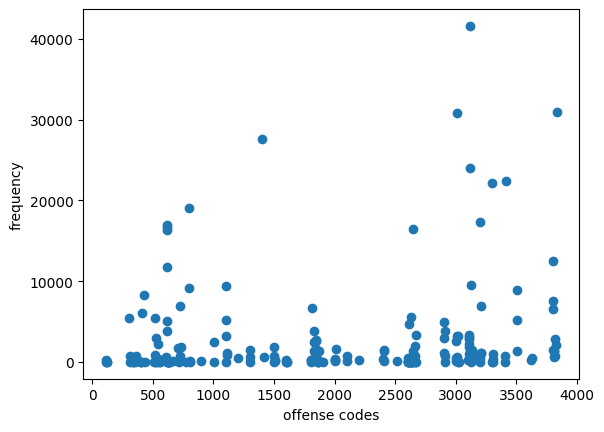

In [140]:
x,y = np.unique(df.offense_code, return_counts = True)
plt.scatter(x,y)
plt.xlabel('offense codes')
plt.ylabel("frequency")
plt.show

#### Conclusion : The crimes ranging with offense_code that are in UCR part three are committed more than other level of crimes.
#### UCR-I -> Serious crimes like murders, rapes, mass killings etc.
#### UCR-II -> Intermediate crimes like Fraud and confidence games.
#### UCR-III -> Low level crimes like verbal abuse.

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


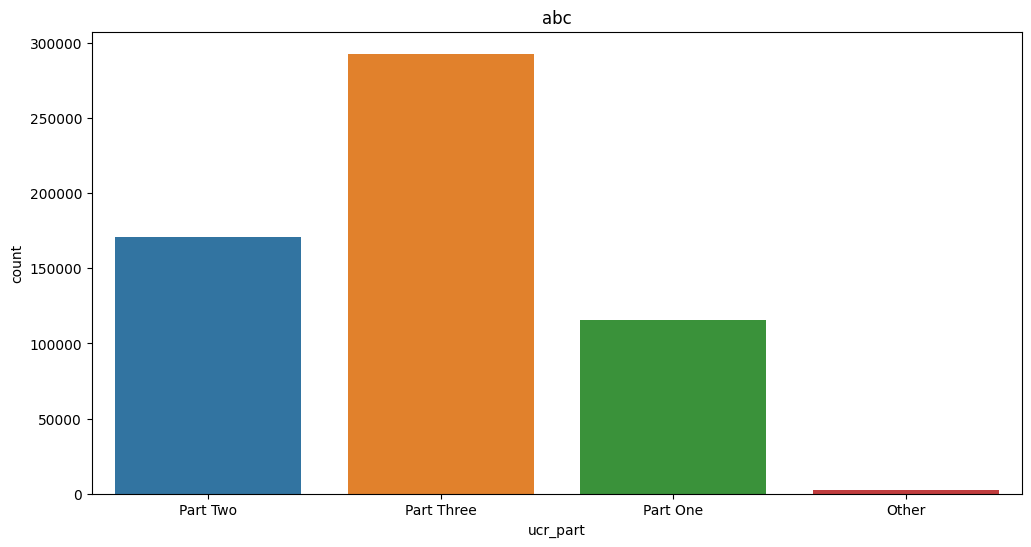

In [19]:
plt.figure(figsize= (12,6))
sb.countplot(data = df,x = 'ucr_part')
plt.title("abc")
plt.show()

### Conclusion :  UCR-III crimes are more common

<AxesSubplot:xlabel='count', ylabel='district'>

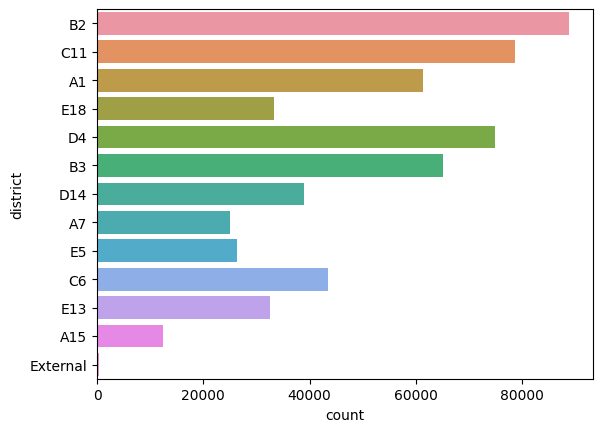

In [20]:
sb.countplot(data = df, y = 'district')

### District B2 has high crime rate may

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

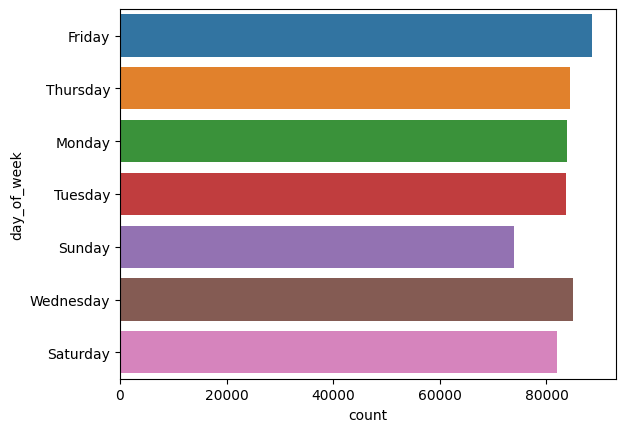

In [21]:
sb.countplot(data = df, y = 'day_of_week')

<AxesSubplot:xlabel='count', ylabel='offense_description'>

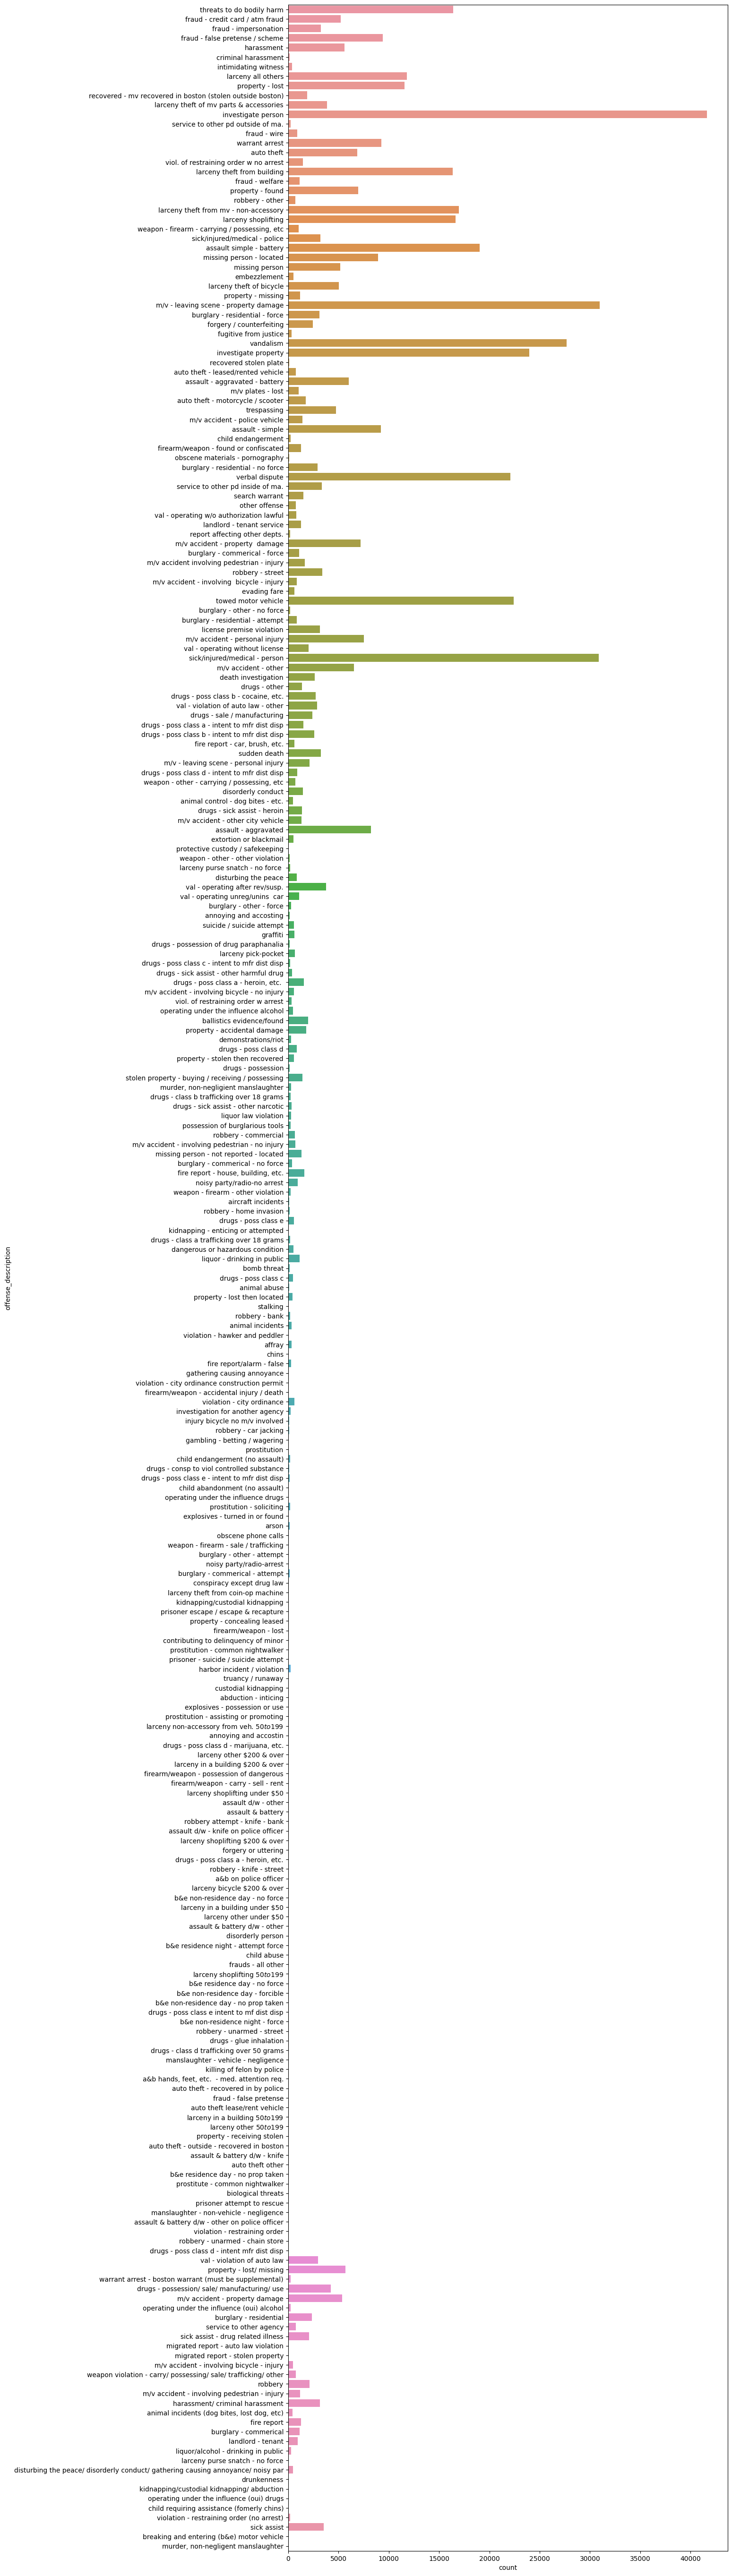

In [22]:
plt.figure(figsize = (12,70))
sb.countplot(data = df, y = "offense_description")

<AxesSubplot:xlabel='shooting', ylabel='count'>

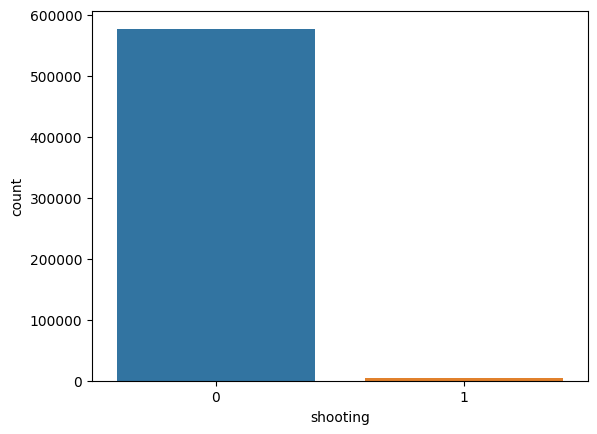

In [23]:
sb.countplot(data = df,x = 'shooting')

<AxesSubplot:xlabel='year', ylabel='count'>

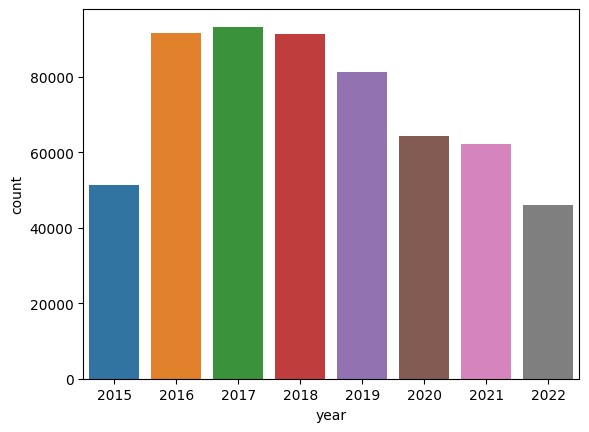

In [24]:
sb.countplot(data = df, x = 'year')

<AxesSubplot:xlabel='count', ylabel='month'>

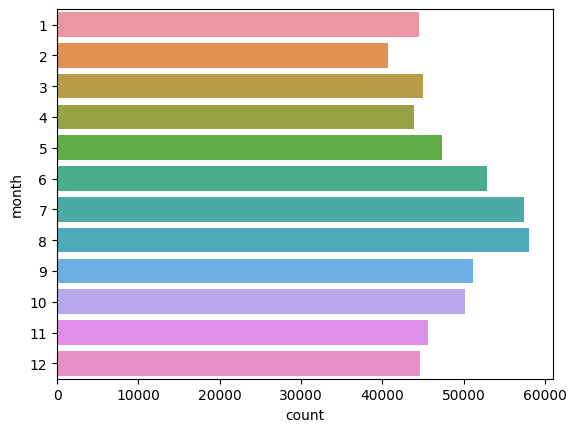

In [25]:
sb.countplot(data = df, y = 'month')

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

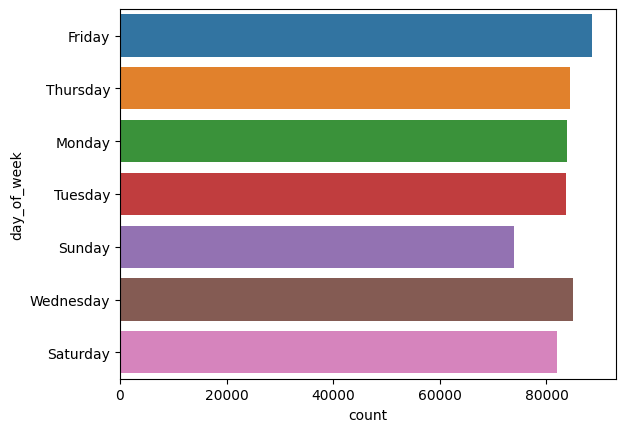

In [26]:
sb.countplot(data = df, y = 'day_of_week')


<AxesSubplot:xlabel='count', ylabel='hour'>

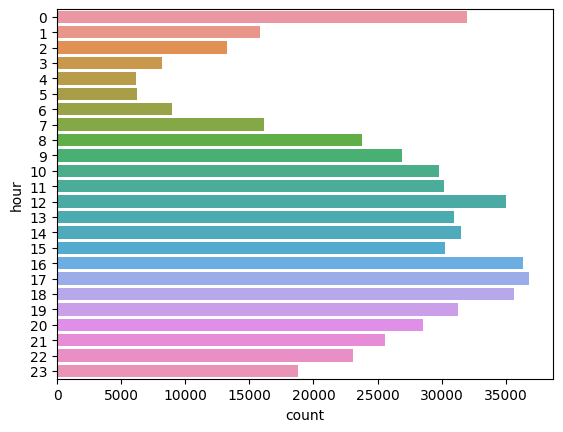

In [27]:
sb.countplot(data = df, y = 'hour')

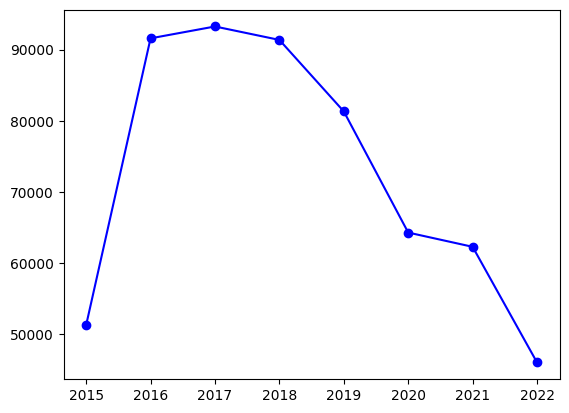

In [106]:
x,y = np.unique(df.year, return_counts = True)
plt.plot(x,y,'bo-')


# Bivariate 

In [29]:
df_2015 = df.groupby('year').get_group(2015)
df_2016 = df.groupby('year').get_group(2016)
df_2017 = df.groupby('year').get_group(2017)
df_2018 = df.groupby('year').get_group(2018)
df_2019 = df.groupby('year').get_group(2019)
df_2020 = df.groupby('year').get_group(2020)
df_2021 = df.groupby('year').get_group(2021)
df_2022 = df.groupby('year').get_group(2022)

In [30]:
yearwise_data = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
l = ["df_2015", "df_2016", "df_2017", "df_2018", "df_2019", "df_2020", "df_2021", "df_2022"]

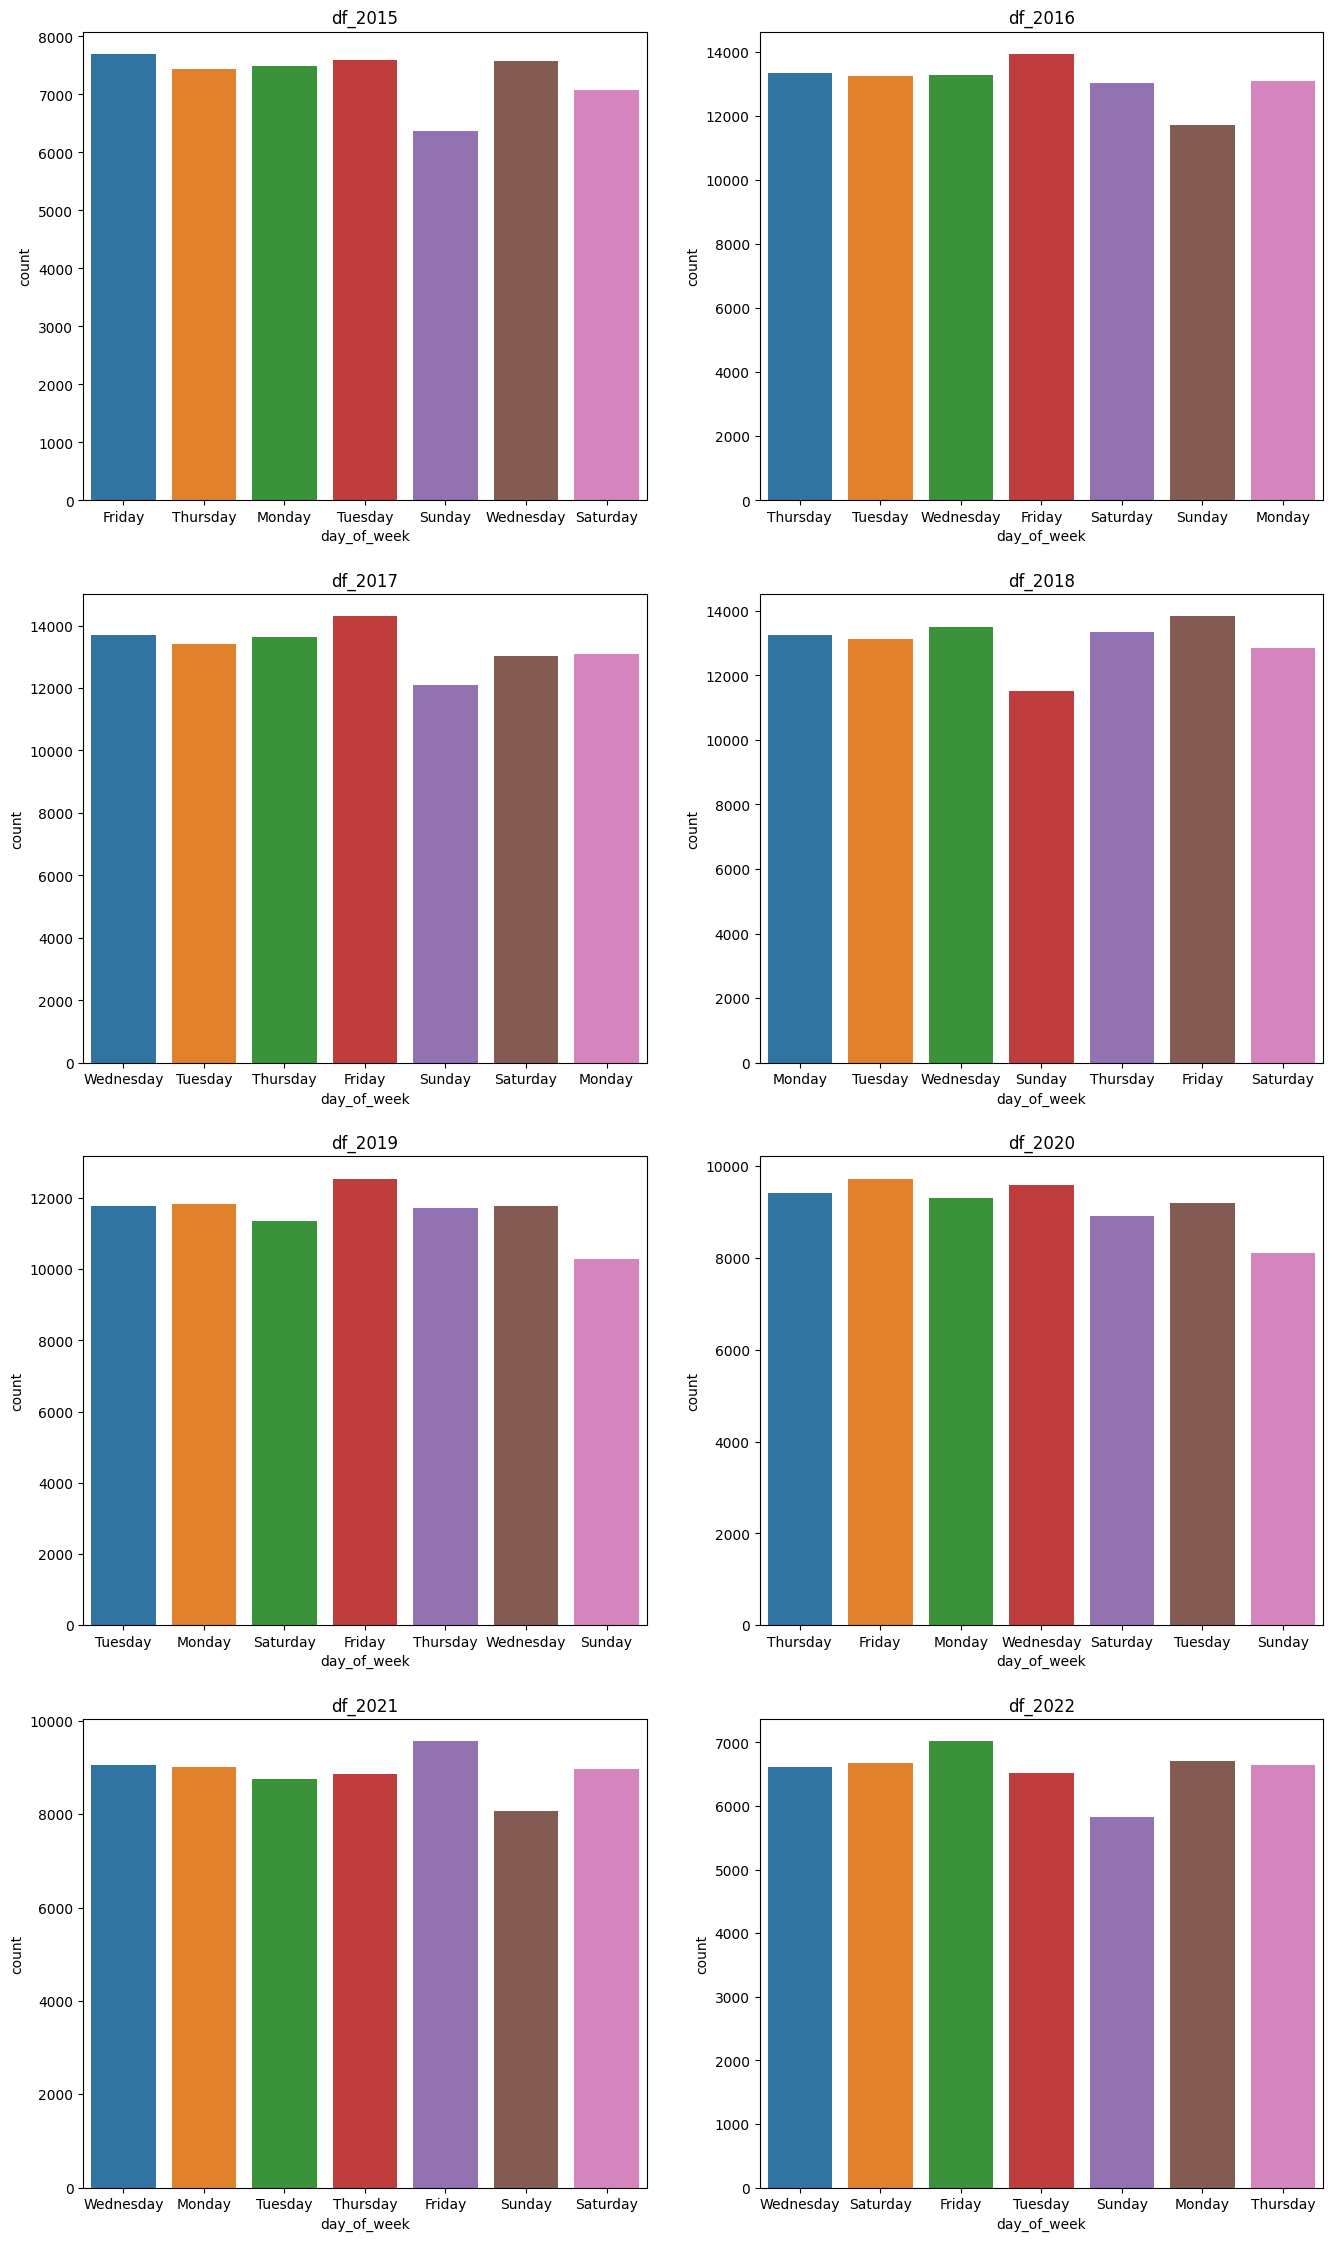

In [31]:
plt.figure(figsize = (16,28))
for i in range(len(yearwise_data)):
    plt.subplot(4,2, i+1)
    sb.countplot(data = yearwise_data[i], x = "day_of_week")
    plt.title(l[i])

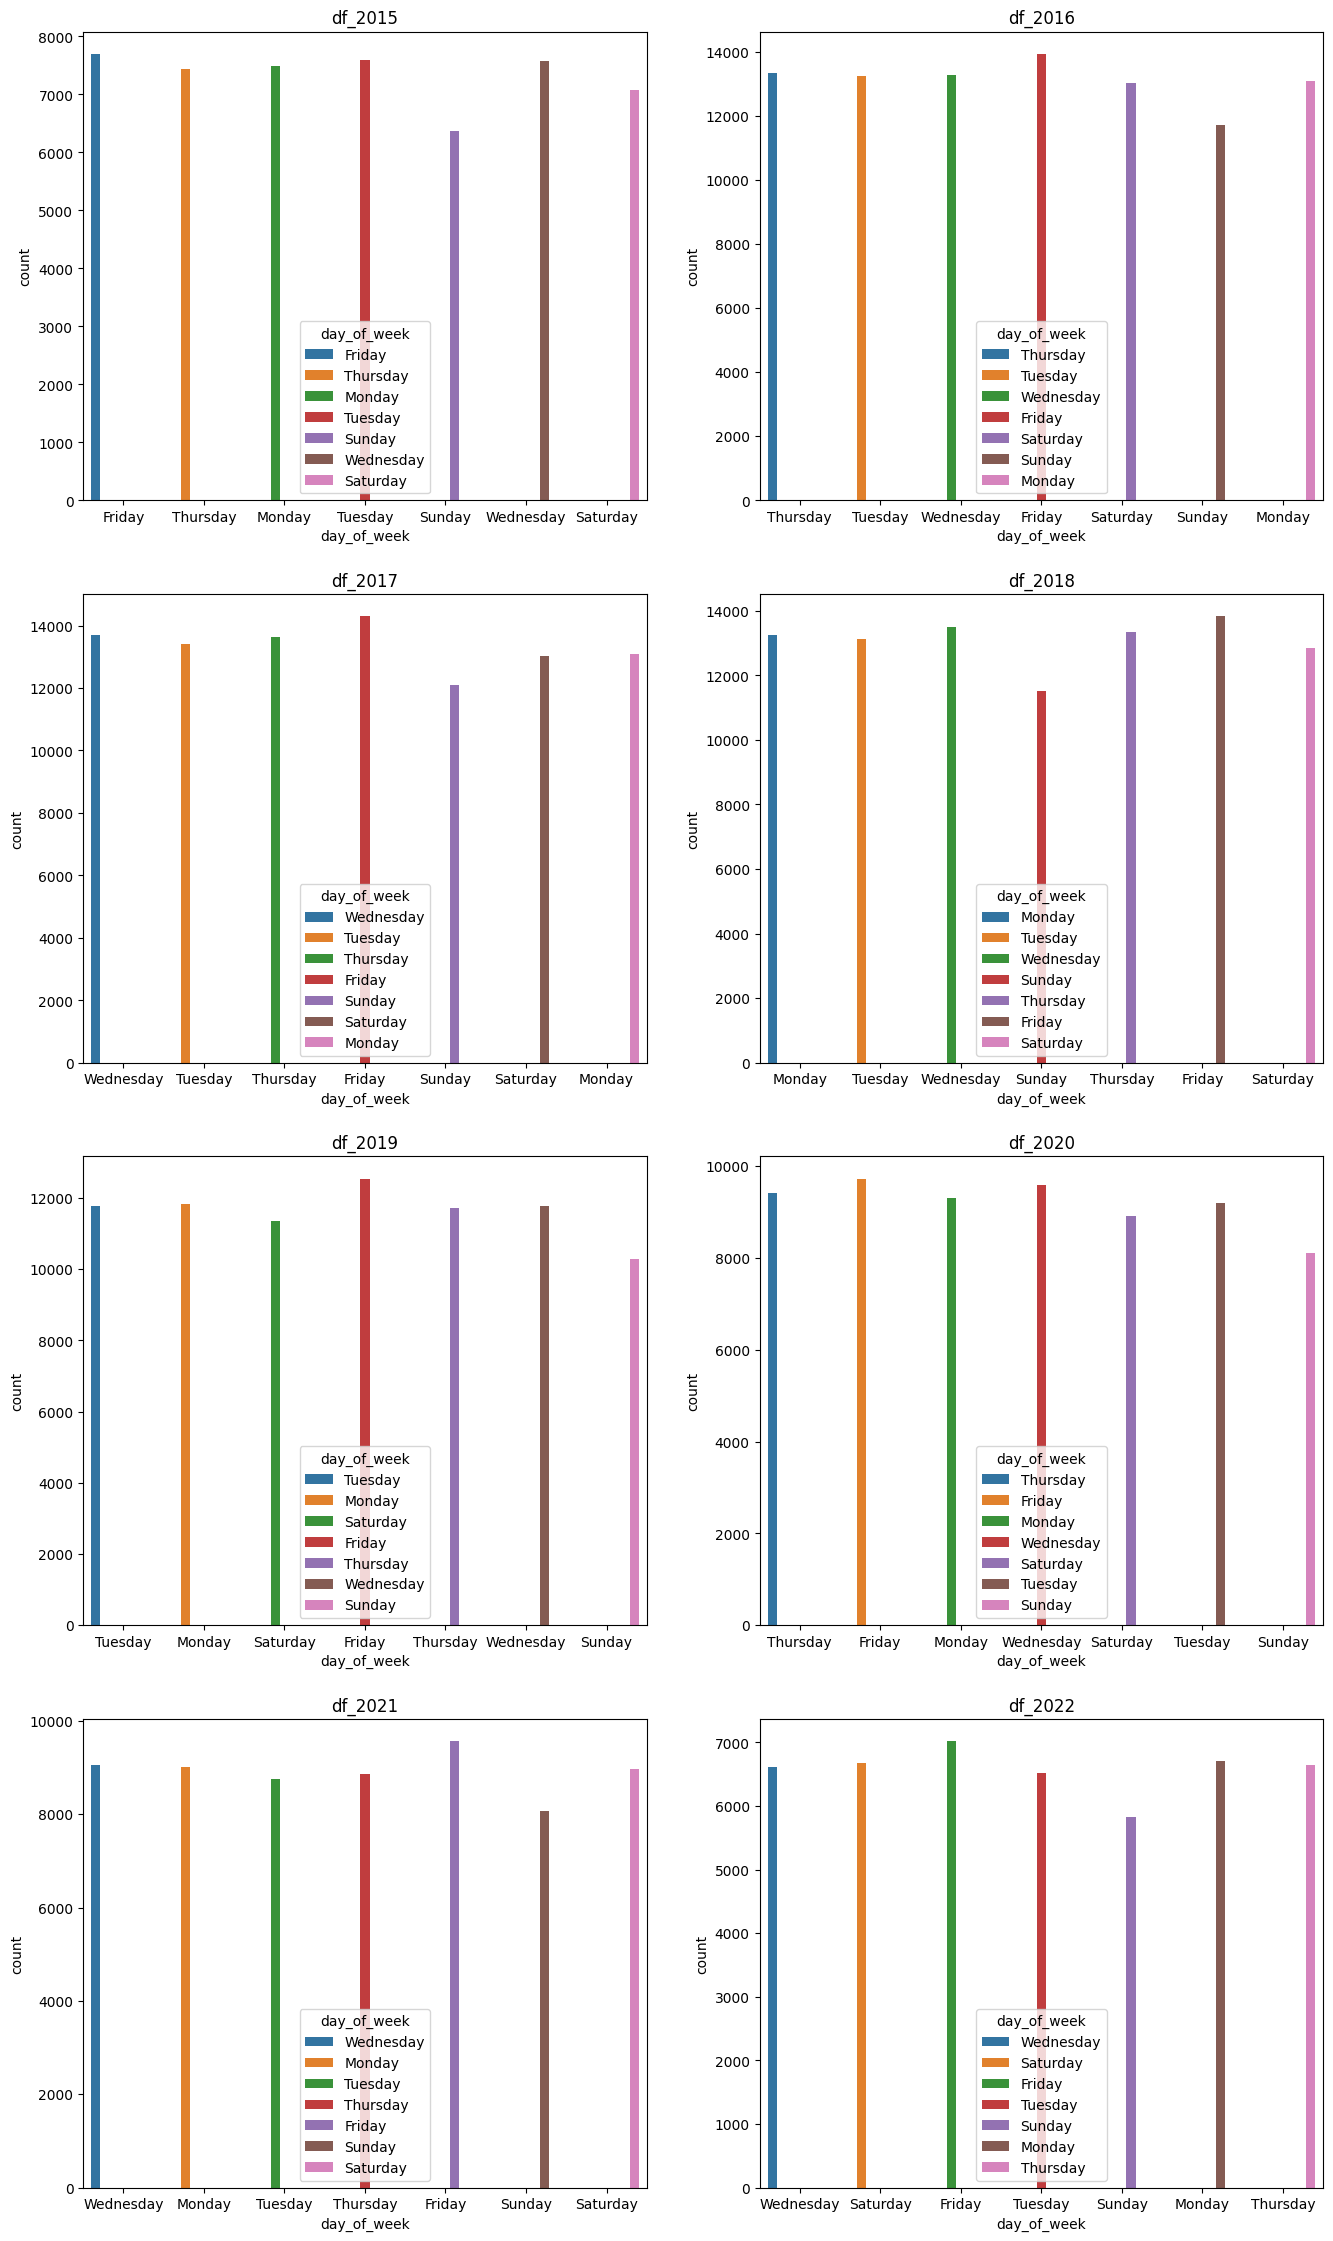

In [92]:
plt.figure(figsize = (16,28))
for i in range(len(yearwise_data)):
    plt.subplot(4,2, i+1)
    sb.countplot(data = yearwise_data[i], x = "day_of_week", hue = 'day_of_week')
    plt.title(l[i])

In [32]:
a = px.scatter_geo(df, 'lat', "long")

In [33]:
df.groupby('ucr_part')["district"]

<AxesSubplot:xlabel='count', ylabel='district'>

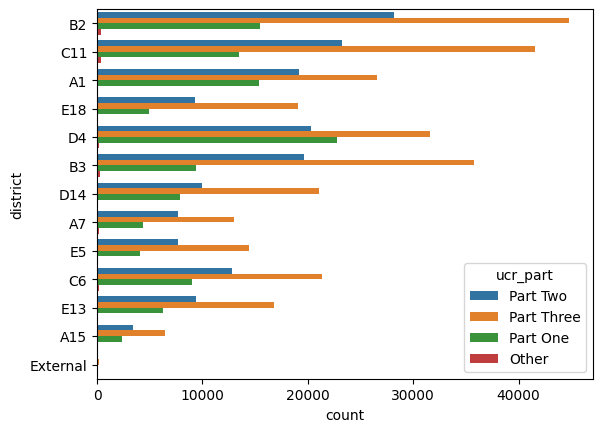

In [34]:
sb.countplot(df, y = df.district, hue = 'ucr_part')

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

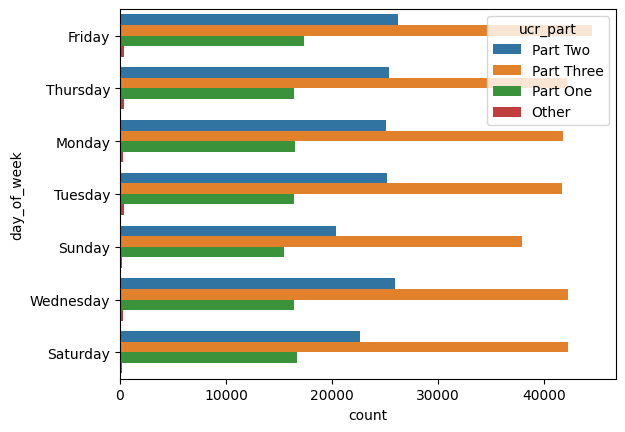

In [91]:
sb.countplot(df, y = df.day_of_week, hue = 'ucr_part')

In [35]:
df.groupby('district').get_group('B2')['street'].unique()

array(['washington st', 'columbia rd', 'fayston st', ...,
       'ritchie st & slayton way\nboston  ma 02119\nunited s',
       'quincy st & warren st\nboston  ma 02121\nunited stat',
       'e cottage st & columbia rd\nboston  ma 02125\nunited'],
      dtype=object)

In [128]:
print(min(df['long']), max(df['long']))
print(min(df['lat']), max(df['lat']))


-71.34946994725333 5.2496912461489327e-08
-1.0 42.46141002105424


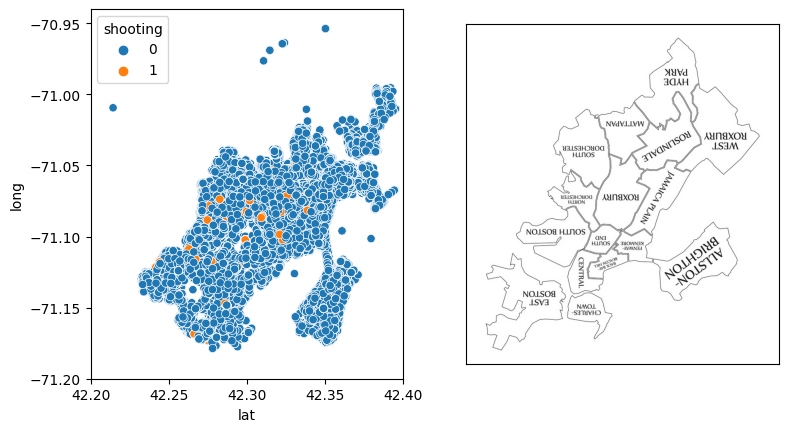

In [136]:
plt.subplot(1,2,1)
sb.scatterplot(df, x = 'lat', y = 'long', hue = 'shooting')
plt.xlim([42.20,42.4])
plt.ylim([-71.2,-70.94])
plt.subplots_adjust(right = 1.2)
plt.subplot(1,2,2)
bg = plt.imread("boston.jpeg")
plt.imshow(bg,alpha = 1)
plt.tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)

(-71.2, -70.94)

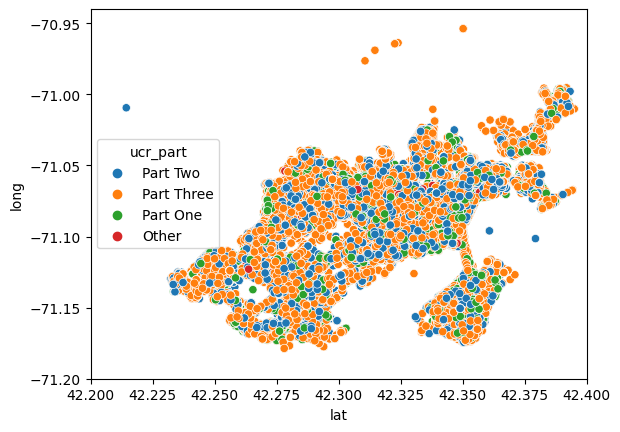

In [75]:
sb.scatterplot(df, x = 'lat', y = 'long', hue = 'ucr_part')
plt.xlim([42.20,42.4])
plt.ylim([-71.2,-70.94])

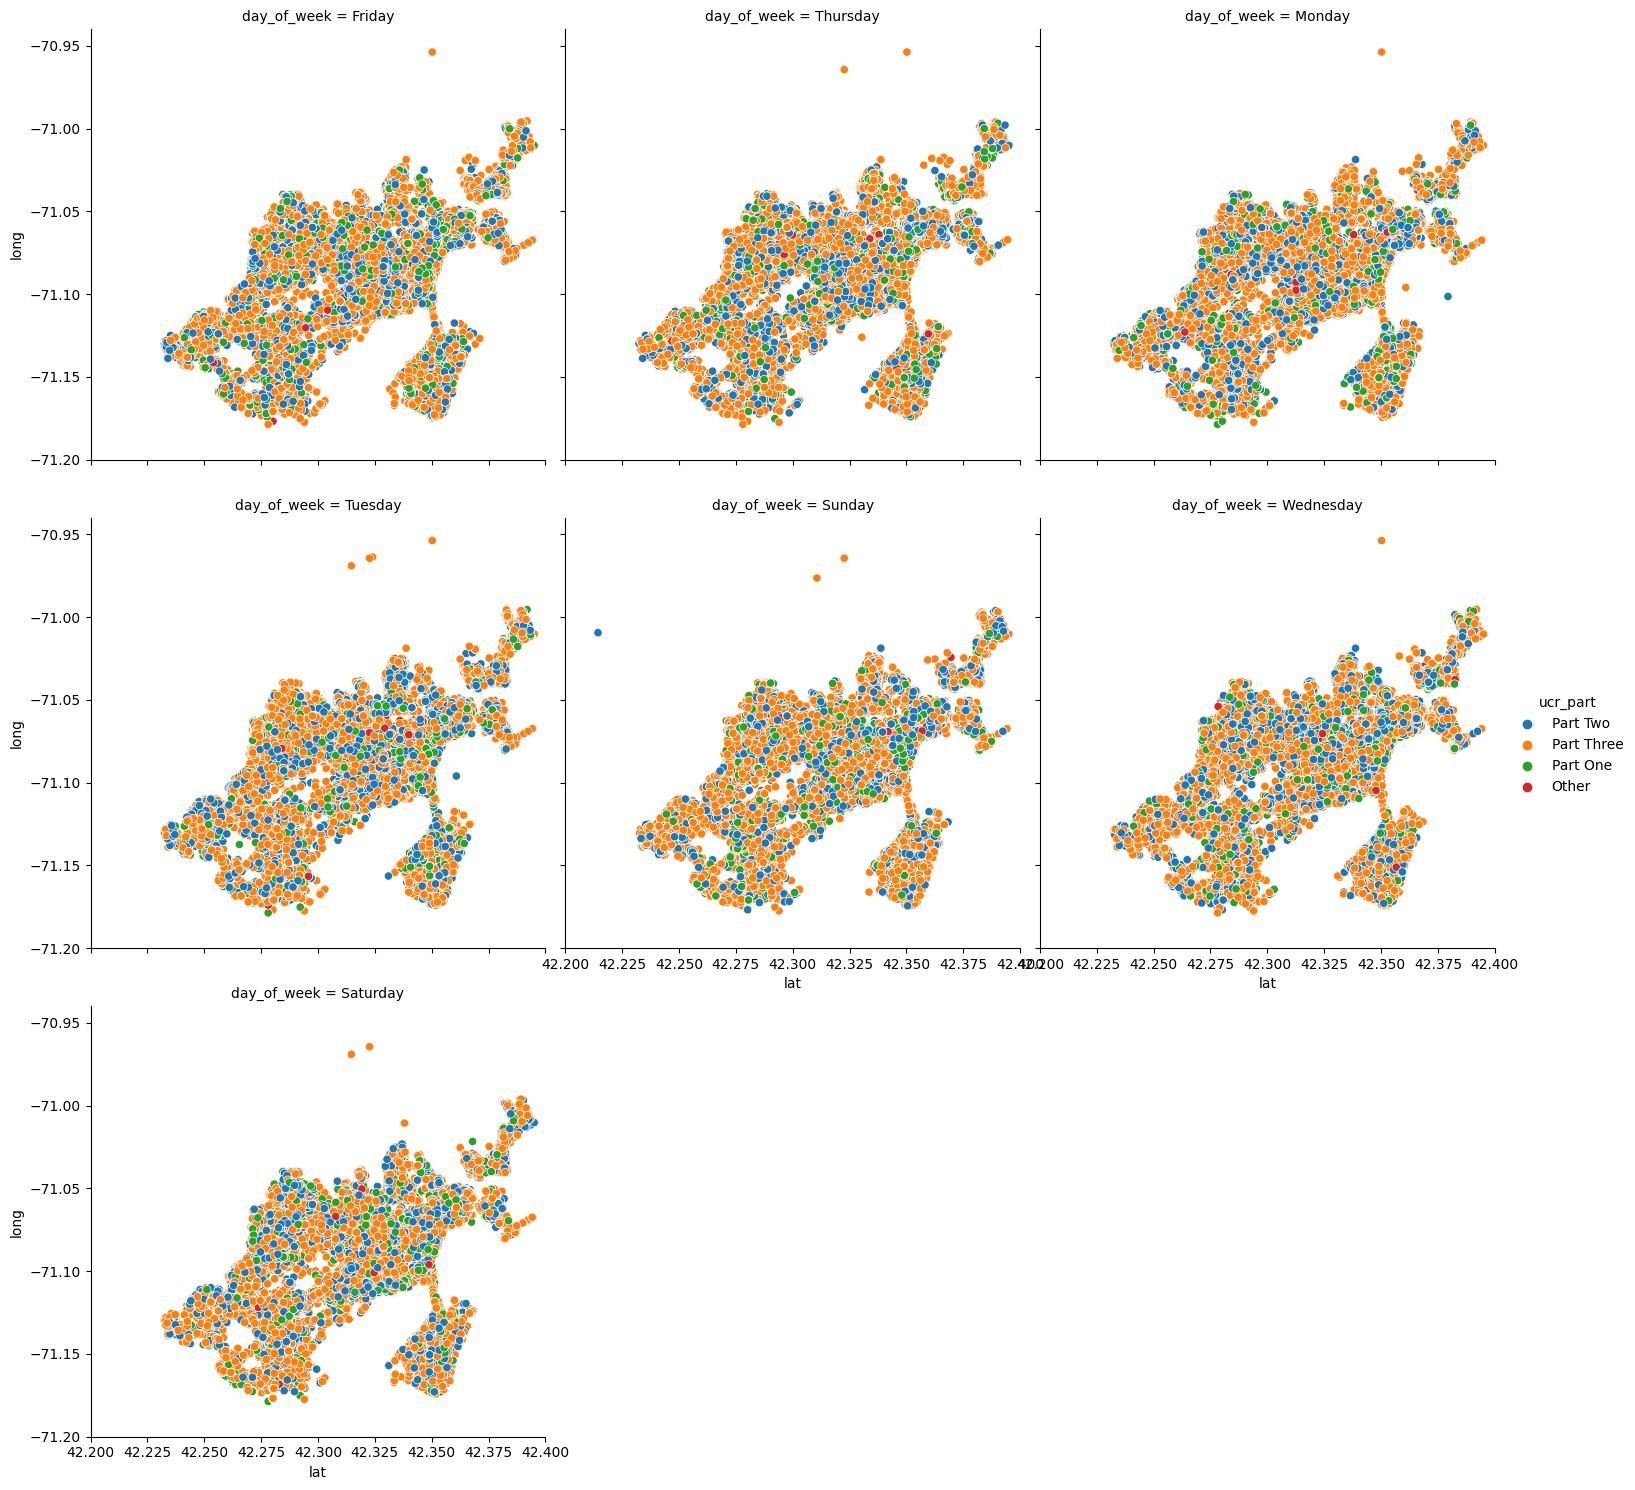

In [84]:
sb.relplot(df, x = 'lat', y = 'long',hue = 'ucr_part', col = 'day_of_week', height = 5, col_wrap = 3 )
plt.xlim([42.20,42.4])
plt.ylim([-71.2,-70.94])
plt.show()

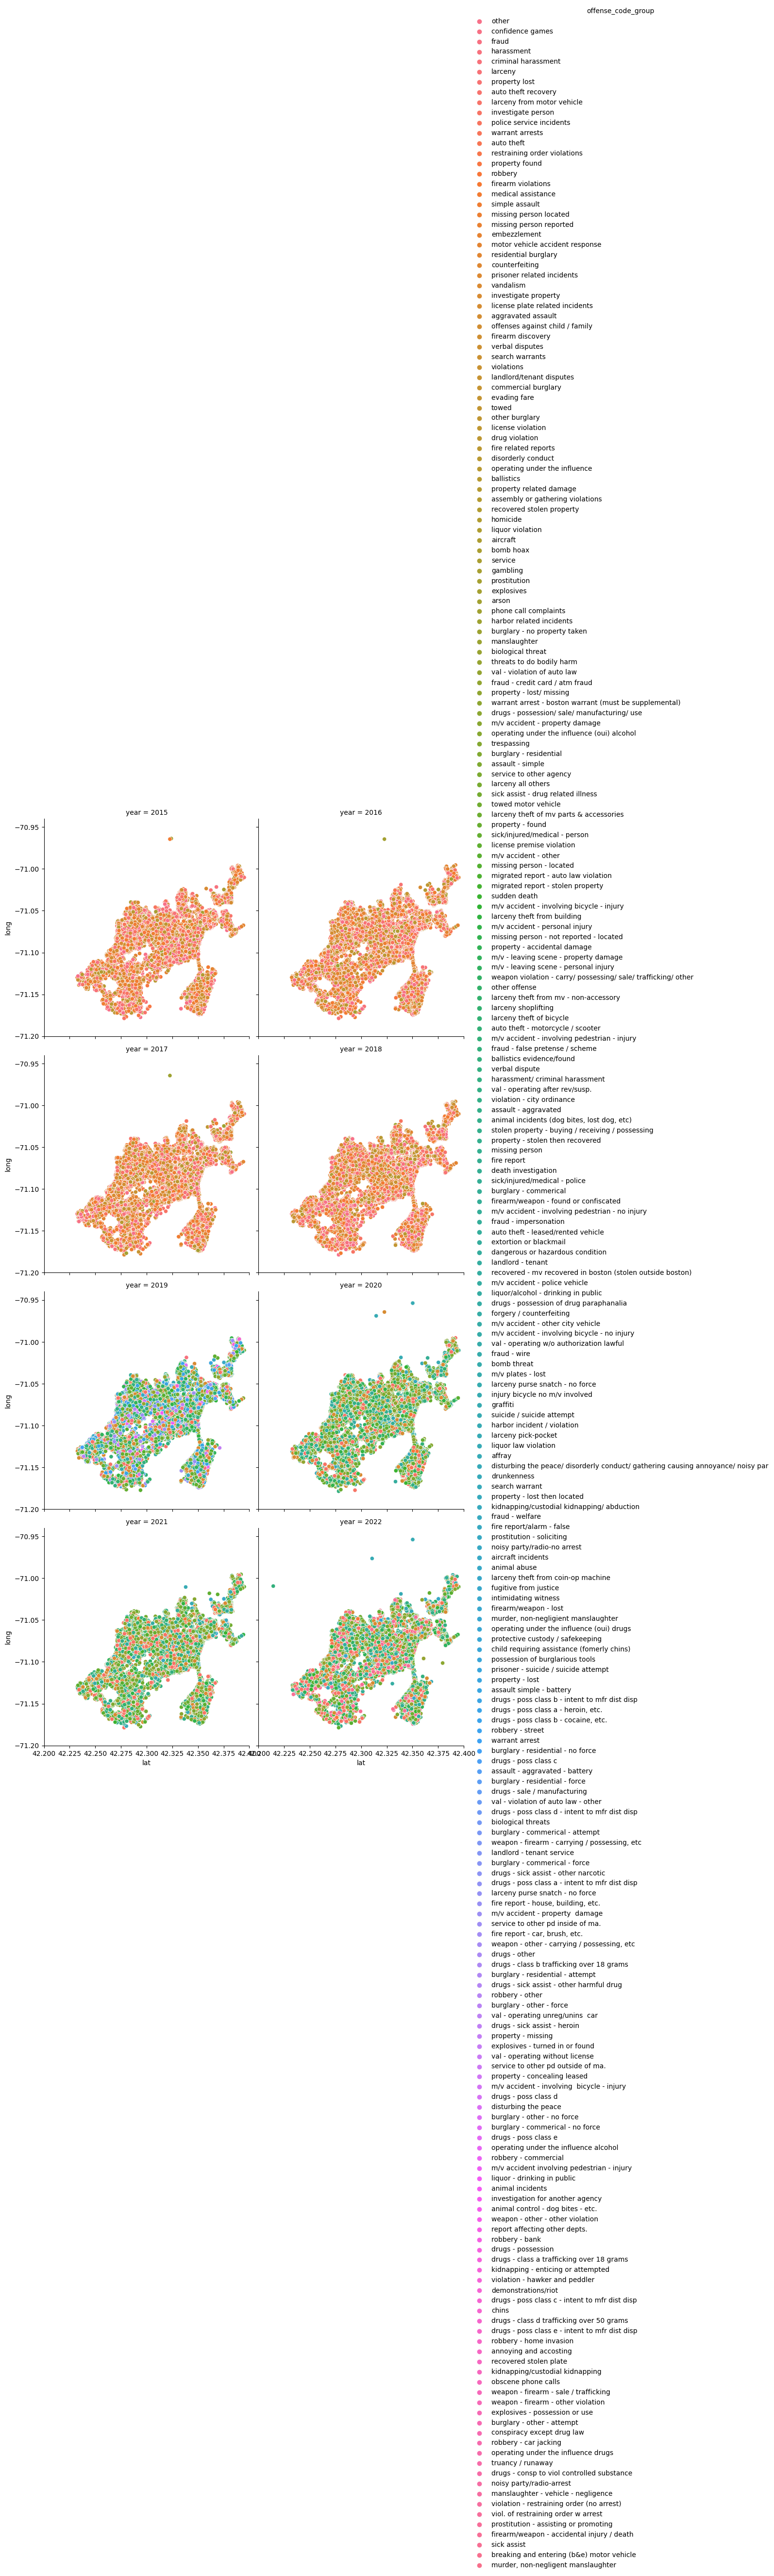

In [99]:
sb.relplot(df, x = 'lat', y = 'long',hue = 'offense_code_group', col = 'year', height = 5, col_wrap = 2)
plt.xlim([42.20,42.4])
plt.ylim([-71.2,-70.94])
plt.show()

In [86]:
df.ucr_part.value_counts()

Part Three    292831
Part Two      170951
Part One      115396
Other           2173
Name: ucr_part, dtype: int64

In [143]:
df.ucr_part.values

array(['Part Two', 'Part Two', 'Part Two', ..., 'Part Three',
       'Part Three', 'Part Three'], dtype=object)

### some

In [37]:
#df.to_csv('forModel.csv', index = False)